In [1]:
import sys
sys.path.append('..')
import os
import shutil
import numpy as np
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import random
import seaborn as sns
import pandas as pd
import pickle

from multiprocess import Pool
from program.helper import *
from program.mlp_optimization import *
from program.utility import *

import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_pil_image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import KFold

In [2]:
with open('../program/label_translator.pkl', 'rb') as pkl_file:
    label_translator = pickle.load(pkl_file)

## Pre-Processing

In [3]:
# Define a Composal of image transformation used for image load
transform_images = Compose([Resize((227, 227)), 
                            ToTensor(),
                            Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [4]:
train_data = ImageFolder("../data/train", transform=transform_images)
test_data = ImageFolder("../data/test", transform=transform_images)

In [5]:
dataloader_train = DataLoader(train_data, batch_size=150, shuffle=True, 
                              num_workers=24, pin_memory=True)
dataloader_test = DataLoader(test_data, batch_size=150, shuffle=True, 
                             num_workers=24, pin_memory=True)

# S6: Anwendung Adam-Optimizer

In [6]:
from networks import FlatAlexNetBN

In [7]:
model_adam_opt = FlatAlexNetBN(n_classes=28)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_adam_opt.parameters(), lr=0.001)
dtype = torch.float32
print_total_params(model_adam_opt)

Trainable Parameters: 72790133


In [18]:
metrics = train_network_kfold(model=model_adam_opt, train_data=train_data, test_data=test_data,
                              criterion=criterion, optimizer=optimizer, n_epochs=40, k_folds=5, batch_sizes=160)

==================== Fold 0 ====================


Epoch: 40/40 // Running Loss: 16.868 // Accuracy: 0.662 : 100%|██████████| 5680/5680 [12:06<00:00,  7.82it/s] 


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.73it/s]

==================== Fold 1 ====================



Epoch: 40/40 // Running Loss: 14.467 // Accuracy: 0.65 : 100%|██████████| 5680/5680 [12:08<00:00,  7.79it/s]  


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.76it/s]

==================== Fold 2 ====================



Epoch: 40/40 // Running Loss: 11.483 // Accuracy: 0.716 : 100%|██████████| 5680/5680 [12:01<00:00,  7.87it/s] 


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.84it/s]


==================== Fold 3 ====================


Epoch: 40/40 // Running Loss: 9.934 // Accuracy: 0.725 : 100%|██████████| 5680/5680 [12:03<00:00,  7.85it/s]  


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.74it/s]


==================== Fold 4 ====================


Epoch: 40/40 // Running Loss: 13.41 // Accuracy: 0.745 : 100%|██████████| 5680/5680 [12:01<00:00,  7.87it/s]  


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.98it/s]


In [19]:
save_file = False

if save_file:
    with open('./saved/s6_optimizer_adam.pkl', 'wb') as pkl_file:
        pickle.dump(metrics, pkl_file)

In [8]:
model_sgd = FlatAlexNetBN(n_classes=28)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_sgd.parameters(),  lr=.008, momentum=.95)
dtype = torch.float32
print_total_params(model_sgd)

Trainable Parameters: 72790133


In [21]:
metrics_opt = train_network_kfold(model=model_sgd, train_data=train_data, test_data=test_data,
                                  criterion=criterion, optimizer=optimizer, n_epochs=40, k_folds=5, 
                                  batch_sizes=160)

==================== Fold 0 ====================


Epoch: 40/40 // Running Loss: 13.472 // Accuracy: 0.628 : 100%|██████████| 5680/5680 [11:58<00:00,  7.91it/s] 


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.75it/s]

==================== Fold 1 ====================



Epoch: 40/40 // Running Loss: 9.404 // Accuracy: 0.67 : 100%|██████████| 5680/5680 [12:03<00:00,  7.85it/s]   


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.80it/s]

==================== Fold 2 ====================



Epoch: 40/40 // Running Loss: 4.88 // Accuracy: 0.686 : 100%|██████████| 5680/5680 [19:18<00:00,  4.90it/s]   


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.92it/s]

==================== Fold 3 ====================



Epoch: 40/40 // Running Loss: 2.839 // Accuracy: 0.73 : 100%|██████████| 5680/5680 [12:02<00:00,  7.86it/s]   


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.75it/s]

==================== Fold 4 ====================



Epoch: 40/40 // Running Loss: 7.1 // Accuracy: 0.739 : 100%|██████████| 5680/5680 [12:04<00:00,  7.85it/s]    


Calculating Metrics ...


Calculate Acc. on Test Data: 100%|██████████| 36/36 [00:05<00:00,  6.75it/s]


In [22]:
if save_file:
    with open('./saved/s6_optimizer_sgd.pkl', 'wb') as pkl_file:
        pickle.dump(metrics_opt, pkl_file)

### Analyze Results

In [30]:
with open('./saved/s6_optimizer_adam.pkl', 'rb') as pkl_file:
    metrics_adam = pickle.load(pkl_file)

In [39]:
losses_adam = pd.DataFrame.from_dict({key:val['losses'] for key, val in metrics_adam.items()})
losses_adam.head(2)

,0,1,2,3,4
0,3.424857,3.413834,3.358531,3.338610,3.344947
1,4.488210,4.520852,3.782523,3.530632,3.616733


In [31]:
with open('./saved/s6_optimizer_sgd.pkl', 'rb') as pkl_file:
    metrics_sgd = pickle.load(pkl_file)

In [40]:
losses_sgd = pd.DataFrame.from_dict({key:val['losses'] for key, val in metrics_sgd.items()})
losses_sgd.head(2)

,0,1,2,3,4
0,3.453862,3.387807,3.382580,3.410423,3.319844
1,3.362001,3.408021,3.348893,3.405629,3.343098


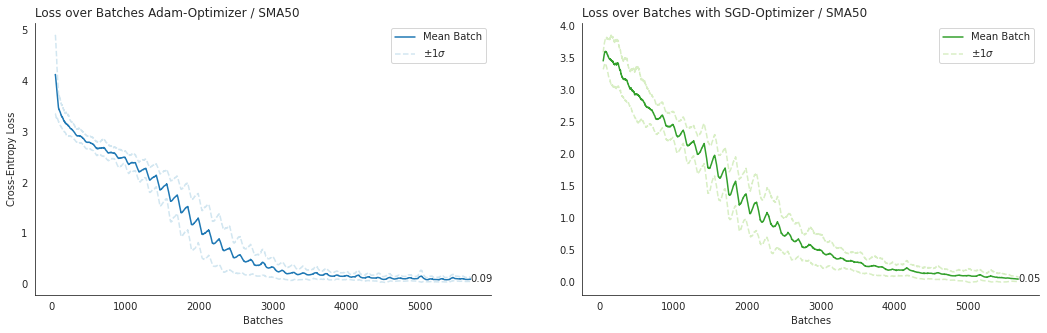

In [75]:
colors = sns.color_palette('Paired', 4)
sns.set_style('white')

fig = plt.subplots(figsize=(18, 5))

sma = 50

plt.subplot(1,2,1)
mean_loss_folds = losses_adam.mean(axis=1)
mean_loss_folds = mean_loss_folds.rolling(sma).mean()
std_loss_folds = losses_adam.std(axis=1)
std_loss_folds = std_loss_folds.rolling(sma).mean()

p = sns.lineplot(x=mean_loss_folds.index, y=mean_loss_folds, label='Mean Batch', color=colors[1])
p = sns.lineplot(x=mean_loss_folds.index, y=mean_loss_folds + std_loss_folds, 
                 label=r'$\pm1\sigma$', color=colors[0], linestyle='--', alpha=.5)
p = sns.lineplot(x=mean_loss_folds.index, y=mean_loss_folds - std_loss_folds, 
                 color=colors[0], linestyle='--', alpha=.5)
plt.text(x=mean_loss_folds.index[-1], y=mean_loss_folds.iloc[-1], 
         s=str(round(mean_loss_folds.iloc[-1], 2)), va='center')
p.set_title(f'Loss over Batches Adam-Optimizer / SMA{50}',loc='left')
p.set_xlabel('Batches')
p.set_ylabel('Cross-Entropy Loss')
sns.despine()

plt.subplot(1,2,2)
mean_loss_folds = losses_sgd.mean(axis=1)
mean_loss_folds = mean_loss_folds.rolling(sma).mean()
std_loss_folds = losses_sgd.std(axis=1)
std_loss_folds = std_loss_folds.rolling(sma).mean()

p = sns.lineplot(x=mean_loss_folds.index, y=mean_loss_folds, label='Mean Batch', 
                 color=colors[3])
p = sns.lineplot(x=mean_loss_folds.index, y=mean_loss_folds + std_loss_folds, 
                 label=r'$\pm1\sigma$', color=colors[2], linestyle='--', alpha=.5)
p = sns.lineplot(x=mean_loss_folds.index, y=mean_loss_folds - std_loss_folds,
                 color=colors[2], linestyle='--', alpha=.5)
plt.text(x=mean_loss_folds.index[-1], y=mean_loss_folds.iloc[-1], 
         s=str(round(mean_loss_folds.iloc[-1], 2)), va='center')
p.set_title(f'Loss over Batches with SGD-Optimizer / SMA{50}',loc='left')
p.set_xlabel('Batches')
sns.despine()

plt.show()

-----------

### Metriken

In [81]:
adam = pd.DataFrame.from_dict({key:val['metrics'] for key, val in metrics_adam.items()}).T
tmp = adam.explode('accuracy')['accuracy']
adam = adam.explode('precision')['precision']
adam = pd.concat([tmp, adam], axis=1, ignore_index=True)
adam.columns = ['Accuracy', 'Precision']
adam = adam.reset_index(drop=True)
adam['set'] = ['train' if i%2==0 else 'test' for i in range(adam.shape[0])]
adam['type'] = 'Adam'
adam.head(2)

,Accuracy,Precision,set,type
0,0.979067,0.979409,train,Adam
1,0.23066,0.227687,test,Adam


In [82]:
sgd = pd.DataFrame.from_dict({key:val['metrics'] for key, val in metrics_sgd.items()}).T
tmp = sgd.explode('accuracy')['accuracy']
sgd = sgd.explode('precision')['precision']
sgd = pd.concat([tmp, sgd], axis=1, ignore_index=True)
sgd.columns = ['Accuracy', 'Precision']
sgd = sgd.reset_index(drop=True)
sgd['set'] = ['train' if i%2==0 else 'test' for i in range(sgd.shape[0])]
sgd['type'] = 'SGD'
sgd.head(2)

,Accuracy,Precision,set,type
0,0.989246,0.989317,train,SGD
1,0.195256,0.198596,test,SGD


In [83]:
df = pd.concat([sgd, adam], axis=0)
df.head(2)

,Accuracy,Precision,set,type
0,0.989246,0.989317,train,SGD
1,0.195256,0.198596,test,SGD


In [84]:
df = df.reset_index(drop=True)
df = df.melt(id_vars=['set', 'type'])
df.columns = ['set', 'optimizer','metric', 'score']
df.head(2)

,set,optimizer,metric,score
0,train,SGD,Accuracy,0.989246
1,test,SGD,Accuracy,0.195256


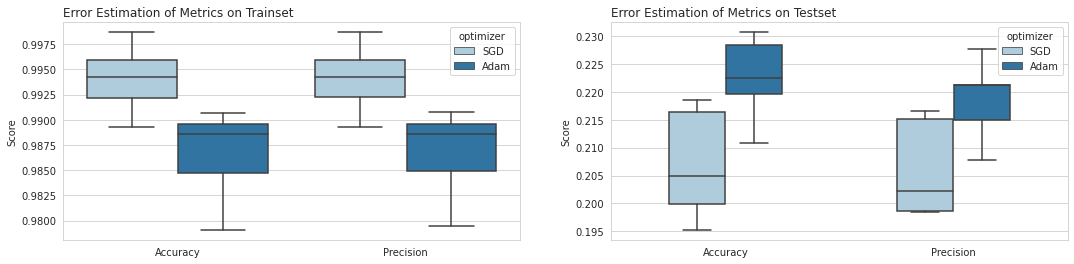

In [87]:
fig = plt.subplots(figsize=(18, 4))

sns.set_palette('Paired', 4)
sns.set_style('whitegrid')
plt.subplot(1,2,1)
tmp = df[df['set'].str.contains('train')]
p = sns.boxplot(data=tmp, x='metric', y='score', hue='optimizer', width=.8)
p.set_title('Error Estimation of Metrics on Trainset', loc='left')
p.set_xlabel('')
p.set_ylabel('Score')

plt.subplot(1,2,2)
tmp = df[df['set'].str.contains('test')]
p = sns.boxplot(data=tmp, x='metric', y='score' , hue='optimizer',width=.5)
p.set_title('Error Estimation of Metrics on Testset', loc='left')
#p.set_xticklabels(['Precision', 'Accuracy'])
p.set_xlabel('')
p.set_ylabel('Score')

plt.show()